Our goal is to (1) make a plot of the twitter degree distribution and (2) to estimate the coefficient.

In [1]:
# Imports, options
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import os

from scipy.optimize import curve_fit

from config import rpath
os.chdir(rpath)

In [2]:
# Read edge list, remove superfluous column, save again
pd.read_csv("data/raw_GER_RADICES.edges.csv").iloc[:,:2].to_csv("data/raw_GER_RADICES_edges_only.csv", index=False, header=False)

# Read edge list as graph
G = nx.read_edgelist("data/raw_GER_RADICES_edges_only.csv", delimiter=',', nodetype=str, create_using=nx.DiGraph)

In [3]:
# Function to get in-degree frequencies
def degree_histogram_directed(G, in_degree=False, out_degree=False):
    """Return a list of the frequency of each degree value.

    Parameters
    ----------
    G : Networkx graph
       A graph
    in_degree : bool
    out_degree : bool

    Returns
    -------
    hist : list
       A list of frequencies of degrees.
       The degree values are the index in the list.

    Notes
    -----
    Note: the bins are width one, hence len(list) can be large
    (Order(number_of_edges))
    """
    nodes = G.nodes()
    if in_degree:
        in_degree = dict(G.in_degree())
        degseq=[in_degree.get(k,0) for k in nodes]
    elif out_degree:
        out_degree = dict(G.out_degree())
        degseq=[out_degree.get(k,0) for k in nodes]
    else:
        degseq=[v for k, v in G.degree()]
    dmax=max(degseq)+1
    freq= [ 0 for d in range(dmax) ]
    for d in degseq:
        freq[d] += 1
    return freq

Text(0, 0.5, 'Frequency')

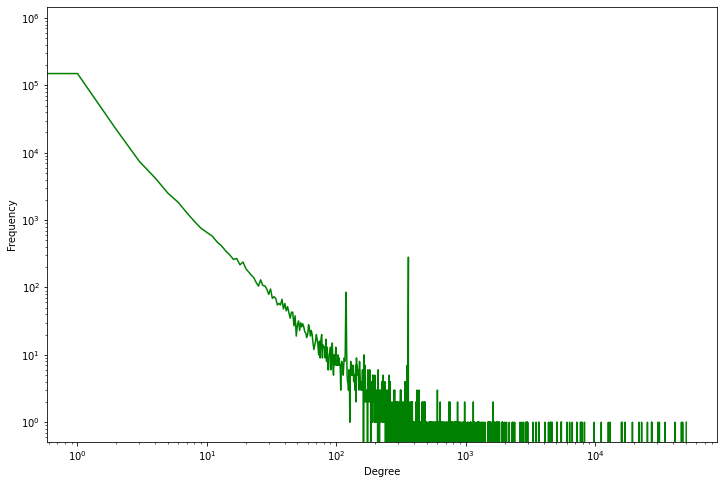

In [4]:
# Degree distn plot
m=0
in_degree_freq = degree_histogram_directed(G, in_degree=True)
#out_degree_freq = degree_histogram_directed(G, out_degree=True)
degrees = range(len(in_degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'g-', label='in-degree') 
#plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='out-degree')
plt.xlabel('Degree')
plt.ylabel('Frequency') 

In [5]:
# Normalize y (degree count) to probabilities, and fit power law to the distribution

In [6]:
y = np.array(in_degree_freq)
x = np.array(degrees)

In [7]:
def powlaw(x, alpha, beta):
    return beta*np.power(x, alpha)

ynew = y/sum(y)
print(sum(ynew))

pars, cov = curve_fit(f=powlaw, xdata=x+1, ydata=ynew, p0=[0, 0], bounds=(-np.inf, np.inf))
pars, cov

0.9999999999999889


(array([-2.53602861,  0.78940055]),
 array([[ 2.34540420e-06, -4.81585829e-08],
        [-4.81585829e-08,  3.13664353e-08]]))

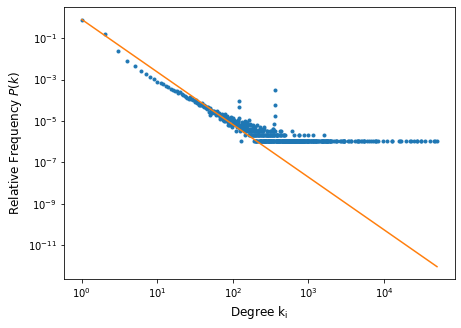

In [18]:
yhat = pars[1] * (x+1)**pars[0]

fig, ax = plt.subplots(figsize=(7,5))
#plt.loglog(range(len(in_degree_freq)), np.array(in_degree_freq)/sum(in_degree_freq), 'g-', label='in-degree') 
ax.loglog(x+1, ynew, "o", markersize=3)
ax.plot(x+1,yhat)
plt.ylabel("Relative Frequency $P(k)$", fontsize=12)
plt.xlabel("Degree $\mathregular{k_i}$", fontsize=12)
plt.minorticks_off()
plt.show()

In [23]:
np.isnan(ynew).any()

False